<a href="https://colab.research.google.com/github/Nagarjunasagar/Loan_repayment_prediction/blob/main/Loan_Repayment_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loan Repayment Prediction**

## **1. Introduction**
Objective of this work is to predict the Loan repayment ability of the applicant based on the historical loan application data.

## This is an standard superviced classification problem statement
- Supervised : Training data which includes labelles is used to train the model to predict labels.
- Clasiification : The label is a binary variable where, 
  - 0 Represents Repayment of Loan on time
  - 1 Represents Having difficulty in repayment of loan





## **2. Data**
Data is from kaggle, rovided by 'Home Credit' a service dedicated to provided lines of credit (loans) to the unbanked population, as part of 'Home Credit Default Risk Competition'.
Actual dataset on kaggle has 7 different sources of data and data in the form of .csv files. Here in this work I used only two files 'application_train.csv' and 'application_test.csv' source of these data is 'Home credit' itself(Some other data is from a Bureau, which is not included in this work). 

## Understanding data 
- Training Data: 
 - 'application_train.csv' is the training data wich has information about each  loan application at 'Home Credit', Every loan has its own row and is defined by the feature `SK_ID_CURR`. 
 - 'application_train.csv' comes with `TARGET` is a binary variable representing, 0 : Loan repaid and 1 : The loan was not paid.

- Testing data :  
 - 'application_test.csv' is the testing data, has all the features/columns in training dataset except `TARGET`
- More details about columns is provided in 'columns_description.xlsx' file
 


## **3. Libraries**
We are using typical Datascience Stack `numpy`, `pandas`, `sklearn`, `matplotlib`, `seaborn`

In [2]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd

# matplotlib and seaborn for plotting
import seaborn as sns
import matplotlib.pyplot as plt

# To suppress warnings
import warnings
warnings.filterwarnings('ignore')

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

import os


## **4. Read the data from datasets**
- List all the files
- Read train data
- Read test data

In [3]:
# List files available
print(os.listdir("/content/drive/MyDrive/Loan_repayment_prediction"))

['application_test.csv', 'application_train.csv', 'columns_description.xlsx']


In [4]:
# Training data
app_train = pd.read_csv('/content/drive/MyDrive/Loan_repayment_prediction/application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Testing data features
app_test = pd.read_csv('/content/drive/MyDrive/Loan_repayment_prediction/application_test.csv')
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,...,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13976,-1866,-2000.0,-4208,NaN,1,1,0,1,1,0,Sales staff,4.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Business Entity Type 3,...,0.2446,0.3739,0.0388,0.0817,reg oper account,block of flats,0.3700,Panel,No,0.0,0.0,0.0,0.0,-1805.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,-13040,-2191,-4000.0,-4262,16.0,1,1,1,1,0,0,NaN,3.0,2,2,FRIDAY,5,0,0,0,0,1,1,Business Entity Type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-821.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN



- Training data has 307511 rows and 122 columns, 
- Testing data has 48744 rows and 121 columns
- Testing test is considerably smaller without `TARGET` column


# Exploratory Data Analysis
- The goal of Exploratory Data Analysis(EDA) is to learn what our data can tell us. This is an open-ended process where we use statistics to make figures to find trends, patterns, outliers and relationships  within the data.
- It generally starts with high level overview, then narrows to a specific areas as we find intriguing areas of data. The findings may be interesting in their own right, or they can be used to inform our modeling choices, such as by helping us decide which features to use.




### **1. Examining the `TARGET` column**
`TARGET` column is a binary variable, which has 0 and 1 as its values,
where: 
- 0 Represents Repayment of Loan on time
- 1 Represents Having difficulty in repayment of loan

In [6]:
app_train["TARGET"].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

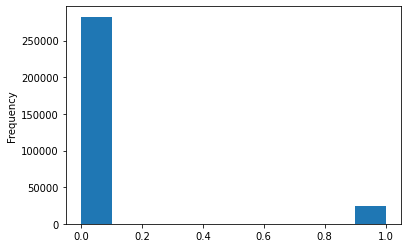

In [7]:
app_train["TARGET"].astype(int).plot.hist()

This is an imbalanced class problem where the total number of a class of data (positive) is far less than the total number of another class of data (negative). There are far more loans that were repaid on time than loans that were not repaid. 

## **2. Examining the missing values in the data**
Lets look at the columns that had missing values and number of missing values in them. Since we cant examine based on their values, lets convert in to Percentage, and list the top.

In [8]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [9]:
# Missing values statistics
missing_values = missing_values_table(app_train)
missing_values.head(20)

Dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


## **3. Columns and their types**
Since the number of columns/features are high lets examine the number of columns based on datatype. `int64` and `float64` are numeric variables and `object` columns cotains strings that are categorical features.

In [10]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

Let's now look at the number of unique entries in each of the `object `(categorical) columns

In [11]:
# Number of unique classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

- Most of the categorical variables has small number of unique entries
- We need to find a way to deal with these categorical values
- Because Machine learning models cant learn from the text data in this case

### **Encoding Categorical variables**
Before we go any further, we need to deal with pesky categorical variables. A machine learning model unfortunately cannot deal with categorical variables (except for some models such as LightGBM). Therefore, we have to find a way to encode (represent) these variables as numbers before handing them off to the model. There are two main ways to carry out this process:
1. **Label Encoding** : 
- Label Encoding is good for variables with 2 unique categories.
- Assigns each unique category in a categorical variable with an integer. No new columns are created.
- For label encoding, we use the Scikit-Learn `LabelEncoder`

- The problem with label encoding is that it gives the categories an arbitrary ordering. The value assigned to each of the categories is random and does not reflect any inherent aspect of the category.

2. **One-hot Encoding** : 
- One-hot encoding is safe option for categorical variables with many classes, because it does not impose arbitrary values to categories.
- Create a new column for each unique category in a categorical variable. Each observation recieves a 1 in the column for its corresponding category and a 0 in all other new columns.
-  For one-hot encoding we use the pandas `get_dummies(df)` function.

- The only downside to one-hot encoding is that the number of features (dimensions of the data) can explode with categorical variables with many categories. To deal with this, we can perform one-hot encoding followed by PCA or other dimensionality reduction methods to reduce the number of dimensions (while still trying to preserve information).



Using Label encoding for variables/columns having 2 or less unique categories

In [12]:
# Create LabelEncoder
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
  if app_train[col].dtype == 'object':
    # for 2 or less unique categories
    if len(list(app_train[col].unique())) <= 2:
      # Train on training data
      le.fit(app_train[col])
      # Transeform both trainin and testing data
      app_train[col] = le.transform(app_train[col])
      app_test[col] = le.transform(app_test[col])

      #keep track of how many columns were label encoded
      le_count += 1

print("%d Colums were label encoded" % le_count)





3 Colums were label encoded


Using One-hot encoding for columns/variables having more than 2 unique categories 

In [13]:
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print("Training features shape :", app_train.shape)
print("Testing features shape :",app_test.shape)

Training features shape : (307511, 243)
Testing features shape : (48744, 239)


### **Alligning Training and Tesing data**

There must same number of features/columns in both Training and Testing data but One-hot encoding create more columns in Training data because there were some categorical variables with categories not represented in the testing data.
To remove the columns in Training data that are not present in testing data, Dtaframes must be `align` 
- First TARGET column must be extracted fro training data because that is not the part of testing data but we need it for future.
- When we do align we must set `axis=1 `so that Dataframes must align based on columns not based on rows

In [14]:
train_labels = app_train['TARGET']

#Align Training and Testing data keep the columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis=1)

#Add the target back in Training data
app_train["TARGET"] = train_labels

print("Trainin Features Shape :", app_train.shape)
print("Testing features Shape : ", app_test.shape)

Trainin Features Shape : (307511, 240)
Testing features Shape :  (48744, 239)


- Now both Training and Testing data has same number of column so that can be fed to Machine Learning model
- The number of features has grown significantly due to One-hot encoding
- At some point we probably want to try dimensionality reduction (removing features that are not relevant) to reduce the size of the datasets.

## **4. Anomalies/Outliers** 
**Exploratory Data Analysis Continued :**
While doing EDA, finding Anomalies within the data is important, anomalies in the data are,
- May be due to miss-typed numbers
- Errors in measuring equipment
- Valid extreme measurements
- One way to support anomalies quantitatively is by looking at the statistics of a column using the `describe` method.

In [15]:
app_train['DAYS_BIRTH'].describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

The numbers in the `DAYS_BIRTH` column are negative because they are recorded relative to the current loan application. To see these stats in years, we can mutliple by -1 and divide by the number of days in a year:

In [16]:
(app_train['DAYS_BIRTH']/-365) .describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

After converting `DAYS_BIRTH` to years, ages looks good. There were no outliers detected either on higher or lower end

Now lets examine `DAYS_EMPLOYED` that is days employed.

In [17]:
(app_train['DAYS_EMPLOYED']/365).describe()

count    307511.000000
mean        174.835742
std         387.056895
min         -49.073973
25%          -7.561644
50%          -3.323288
75%          -0.791781
max        1000.665753
Name: DAYS_EMPLOYED, dtype: float64

max = 1000 YEARS..!!!! Looks unusal right.. Thats an outlier

Examining `DAYS_EMPLOYED` shows that it has outliers.

Text(0.5, 0, 'Days Employed')

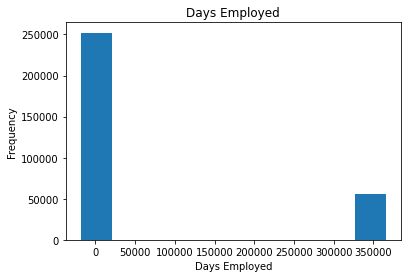

In [18]:
import matplotlib.pyplot as plt
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employed');
plt.xlabel("Days Employed")


In [19]:
# Lets look for the number of outliers we had inthe column
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
# other values
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]

print("The number of outliers with employed days = 365243, are :", len(anom))
print("The non_anomalies default on %0.2f%% of loans"  % (100 * non_anom['TARGET'].mean()))
print("The anomalies default on %0.2f%% of loans"  % (100 * anom['TARGET'].mean()))


The number of outliers with employed days = 365243, are : 55374
The non_anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans


There are 55374 outlier entries with same value
Well that is extremely interesting! It turns out that the anomalies have a lower rate of default.

Handling the anomalies depends on the exact situation, with no set rules. One of the safest approaches is just to set the anomalies to a missing value and then have them filled in (using Imputation) before machine learning. In this case, since all the anomalies have the exact same value, we want to fill them in with the same value in case all of these loans share something in common. The anomalous values seem to have some importance, so we want to tell the machine learning model if we did in fact fill in these values. As a solution, we will fill in the anomalous values with not a number (np.nan) and then create a new boolean column indicating whether or not the value was anomalous.

In [20]:
# create anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train['DAYS_EMPLOYED'] == 365243

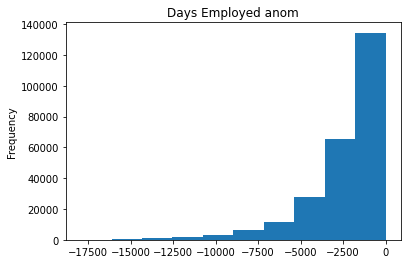

In [21]:
# Convert anomalous values to nan values
app_train['DAYS_EMPLOYED'].replace({365243 : np.nan}, inplace = True)
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employed anom')

The distribution looks to be much more in line with what we would expect, and we also have created a new column to tell the model that these values were originally anomalous (becuase we will have to fill in the nans with some value, probably the median of the column). The other columns with DAYS in the dataframe look to be about what we expect with no obvious outliers.

**As an extremely important note, anything we do to the training data we also have to do to the testing data. Let's make sure to create the new column and fill in the existing column with np.nan in the testing data.**

In [22]:
# lets count the number of outliers with value = 365243 in the 'DAYS_EMPLOYED ' column of test dataframe
test_anom = app_test[app_test['DAYS_EMPLOYED'] == 365243] 

In [23]:
len(test_anom)

9274

there are 9274 entries in the column with value 365243 

Lets make a new column from this column to store anomalous entries, because in the actual column we need to replace the anomalous values with 'nan' values

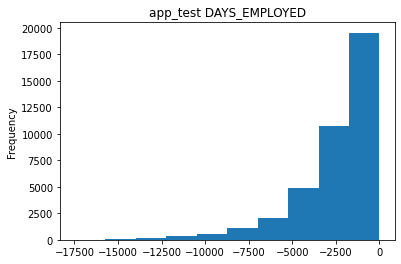

In [24]:
# Creating anew column
app_test['TEST_ANOM_DAYS_EMPLOYED'] = app_test['DAYS_EMPLOYED'] == 365243

# Replace the anomalous values in the app_test['DAYS_EMPLOYED'] column to nan values
app_test['DAYS_EMPLOYED'].replace({365243 : np.nan}, inplace = True)
app_test['DAYS_EMPLOYED'].plot.hist(title = 'app_test DAYS_EMPLOYED')

In [25]:
# Confirming the number of columns in both train and test set after all the above modifications
print(app_train.shape)
print(app_test.shape)

(307511, 241)
(48744, 240)


## **5. Correlation**

Now that we have dealt with the categorical variables and the outliers, let's continue with the EDA. One way to try and understand the data is by looking for correlations between the features and the target. We can calculate the Pearson correlation coefficient between every variable and the `target` using the `.corr` dataframe method.

The correlation coefficient is not the greatest method to represent "relevance" of a feature, but it does give us an idea of possible relationships within the data. Some general interpretations of the absolute value of the correlation coefficent are:

- .00 - .19 “very weak”
- .20 - .39 “weak”
- .40 - .59 “moderate”
- .60 - .79 “strong”
- .80 - 1.0 “very strong”

In [26]:
# Find the correlation withthe Target and Sort
correlations =app_train.corr()['TARGET'].sort_values()

In [27]:
# print correlations
print("Most positive Correlations are:\n", correlations.tail(15))
print("\nMost negetive Correlations are:", correlations.head(15))

Most positive Correlations are:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most ne

Let's take a look at some of more significant correlations: 
- The `DAYS_BIRTH` is the most positive correlation. (except for TARGET because the correlation of a variable with itself is always 1!) Looking at the documentation, DAYS_BIRTH is the age in days of the client at the time of the loan in negative days (for whatever reason!). 
- The correlation is positive, but the value of this feature is actually negative, meaning that as the client gets older, they are less likely to default on their loan (ie the target == 0). 
- That's a little confusing, so we will take the absolute value of the feature and then the correlation will be negative.

### Effect of Age on  Repayment

In [28]:
# Find the correlation of the positive days since birth and target
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982694

As the client gets older, there is a negative linear relationship with the target meaning that as clients get older, they tend to repay their loans on time more often.

Let's start looking at this variable. First, we can make a histogram of the age. We will put the x axis in years to make the plot a little more understandable.

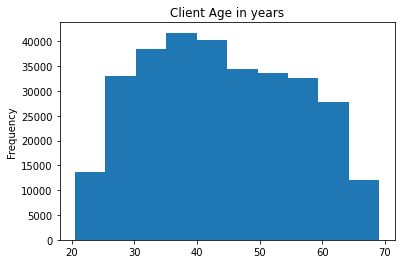

In [29]:
(app_train['DAYS_BIRTH']/365).plot.hist(title='Client Age in years')

Text(0, 0.5, 'Count')

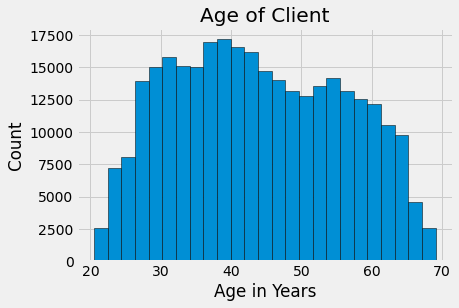

In [30]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in Years
plt.hist(app_train['DAYS_BIRTH']/365, edgecolor = 'k', bins = 25)
plt.title('Age of Client')
plt.xlabel('Age in Years')
plt.ylabel('Count')

By itself, the distribution of age does not tell us much other than that there are no outliers as all the ages are reasonable. 
- To visualize the effect of the age on the target, we will next make a kernel density estimation plot (KDE) colored by the value of the target. 
- A kernel density estimate plot shows the distribution of a single variable and can be thought of as a smoothed histogram (it is created by computing a kernel, usually a Gaussian, at each data point and then averaging all the individual kernels to develop a single smooth curve). 
- We will use the seaborn kdeplot for this graph.

Text(0, 0.5, 'Density')

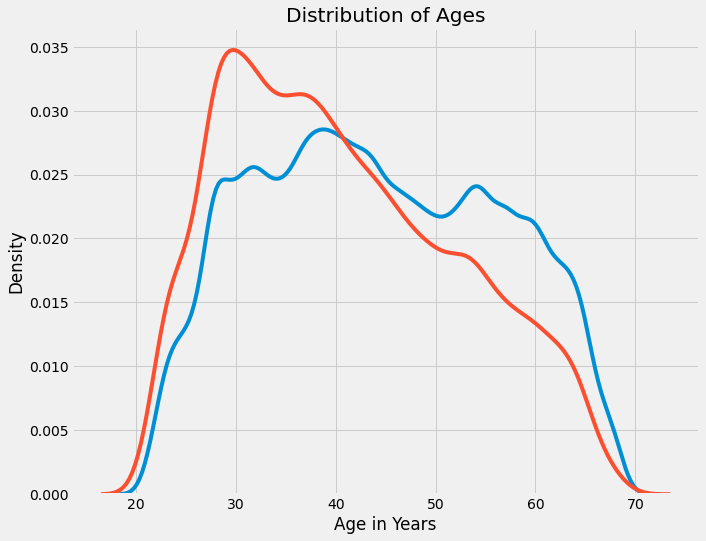

In [45]:
plt.figure(figsize = (10,8))

#KDE plot of loans that repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH']/365, label = 'TARGET == 0')

#KDE plot of loans which were not repayed on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH']/365, label = 'TARGET == 1')

# Labeling of plot
plt.title('Distribution of Ages'); plt.xlabel('Age in Years'); plt.ylabel('Density')

The target == 1 curve skews towards the younger end of the range. Although this is not a significant correlation (-0.07 correlation coefficient), this variable is likely going to be useful in a machine learning model because it does affect the target. Let's look at this relationship in another way: average failure to repay loans by age bracket.

To make this graph, first we cut the age category into bins of 5 years each. Then, for each bin, we calculate the average value of the target, which tells us the ratio of loans that were not repaid in each age category.

In [46]:
# Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"
